In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for visualizing the data
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\mr\Desktop\Projects\Diwali Sales Data.csv', encoding= 'unicode_escape')
#To avoid unicode errror use unicode_escape

In [3]:
df.shape #to get number of rows and columns in the dataset

(11251, 15)

In [4]:
df.head() #to see the first five rows in the dataset

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# DATA CLEANING

In [5]:
df.info() #one of the methods used for data cleaning, can be used to the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status','unnamed1'], axis=1, inplace=True)#To drop null columns 

***Inplace is used to save the changes made in the dataset till the above line is executed***

In [7]:
pd.isnull(df)# Gives out true and false values stating there are no null values

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
pd.isnull(df).sum() #to see the number of null values in each column


User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.shape #using df.shape here to ensure null values are dropped

(11251, 13)

In [10]:
df.dropna(inplace=True) # to delete null values if any

In [11]:
df.shape #checking if 12 rows are deleted as above we saw Amount column has 12 null values

(11239, 13)

In [12]:
pd.isnull(df).sum() # checking again for null values

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

***As we can see the 12 rows hav been deleted***

In [13]:
df['Amount'] = df['Amount'].astype(int) #To change datatype of the column

In [14]:
df['Amount'].dtypes #checking if datatype is changed

dtype('int32')

***Here Datatype changed from float64 to int32***

In [15]:
df.describe() #to get a mathematical overview of the dataset

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender 

In [16]:
df.columns #to see the columns in the dataset


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

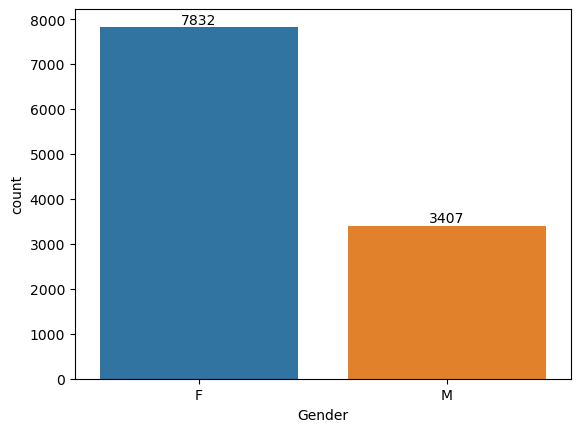

In [17]:
ax = sns.countplot(x = 'Gender' , data = df)

for bars in ax.containers:  #To add labels to the graph
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

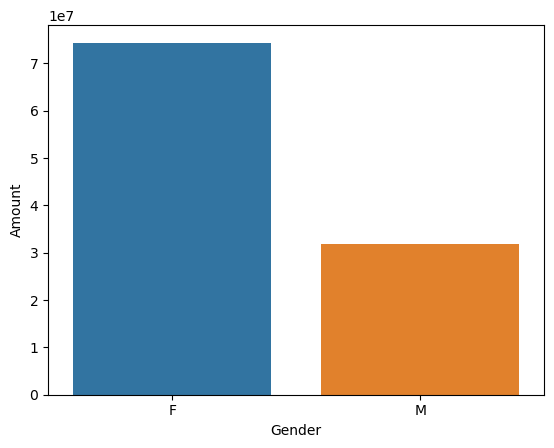

In [18]:
sales_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by ='Amount', ascending = False)

sns.barplot(x = 'Gender', y = 'Amount', data = sales_gender) 
# to get amount spent per Gender


***From above two graphs we can say that Females have purchased more than Males and also Purchasing power of females is more***

### AgeGroup 

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

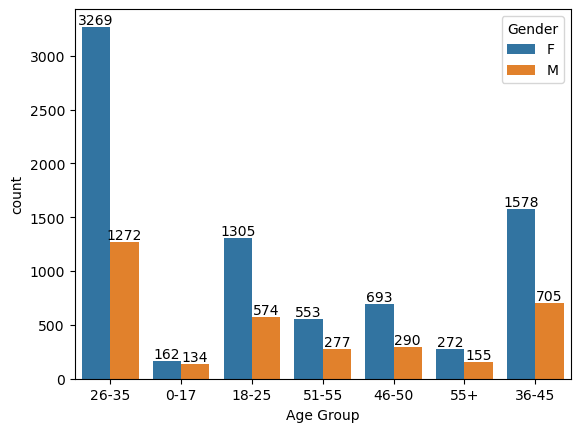

In [20]:
ax = sns.countplot(x = 'Age Group', hue = 'Gender', data = df)

for bars in ax.containers:  #To add labels to the graph
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

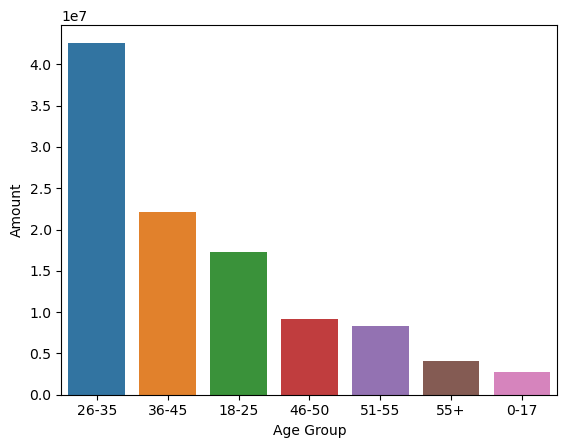

In [21]:
sales_agegrp = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_agegrp)
# To get amount spent per each Age Group



***From above graph we can say that most buyers are from the women between Age Group of 26-35***

### State 

In [22]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

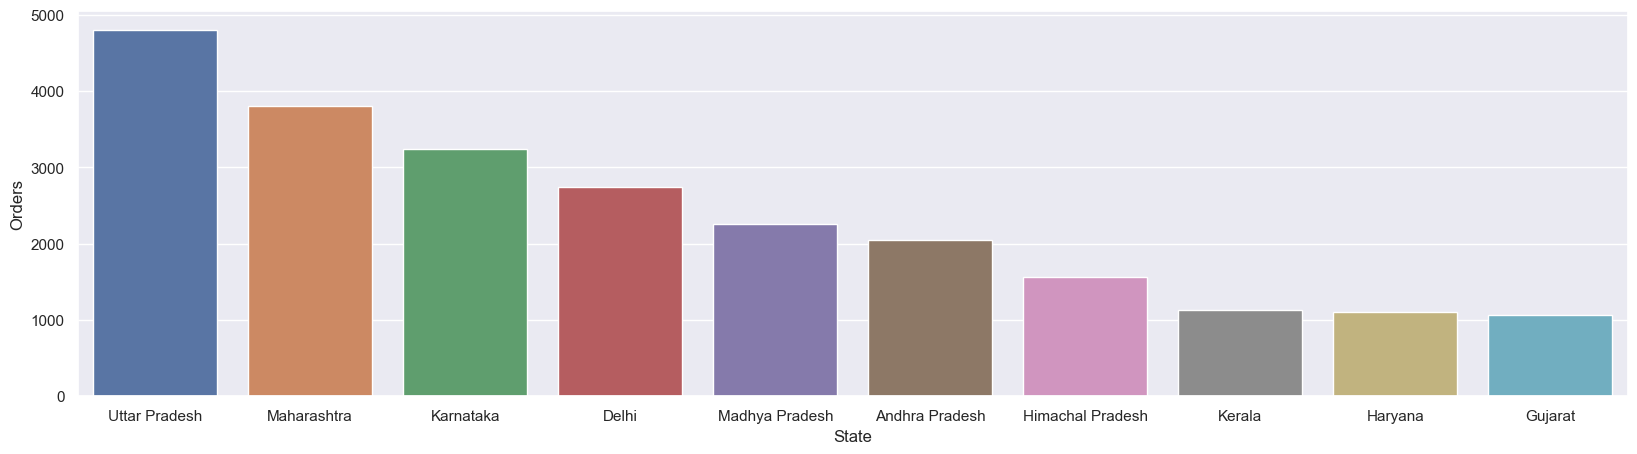

In [23]:
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'State', y = 'Orders', data = sales_state)
# To get the number of Orders of top 10 states

***From above graph we can say that the top 3 states with most orders are UttarPradesh,Maharastra,KArnataka***

<Axes: xlabel='State', ylabel='Amount'>

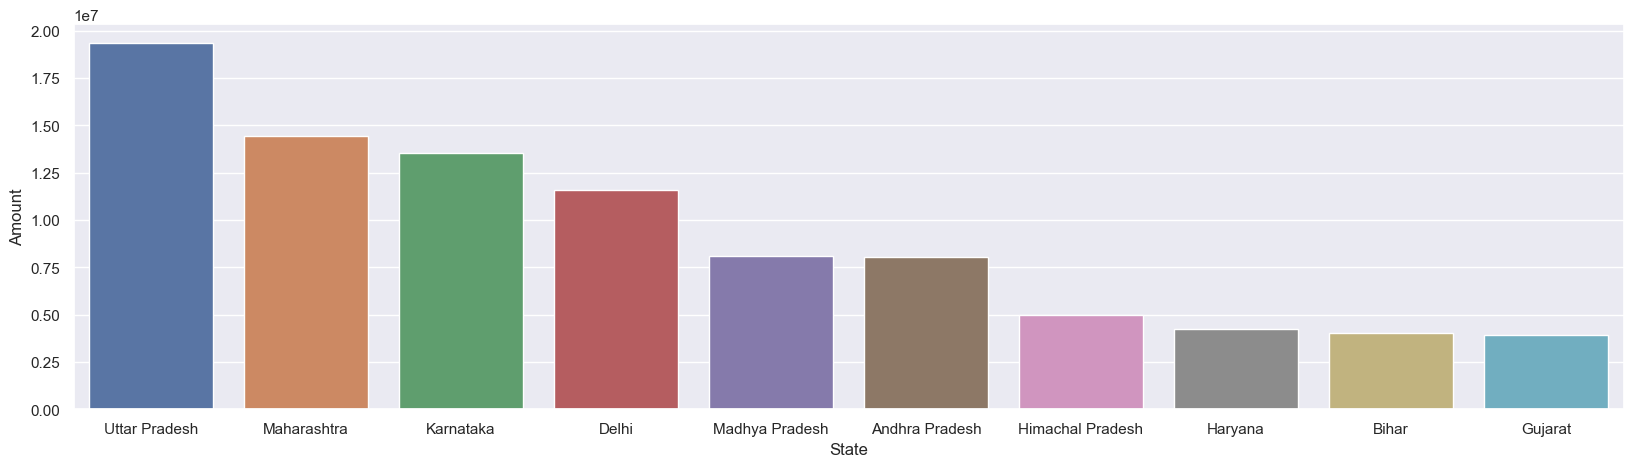

In [24]:
sales_state1 = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x= 'State', y = 'Amount', data = sales_state1)
#To get Amount spent by top 10 states

***Here from above graph we can say that the top 3 amount spending States are UttarPradesh,Maharastra,Karnataka***

### Marital Status

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

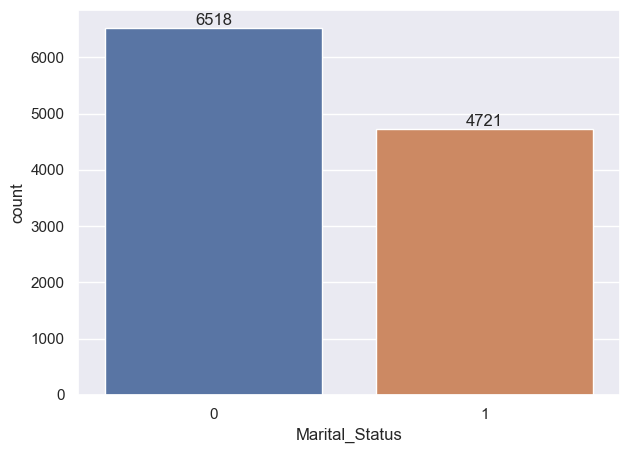

In [36]:
ax = sns.countplot(x = 'Marital_Status', data = df )

sns.set(rc={'figure.figsize':(7,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

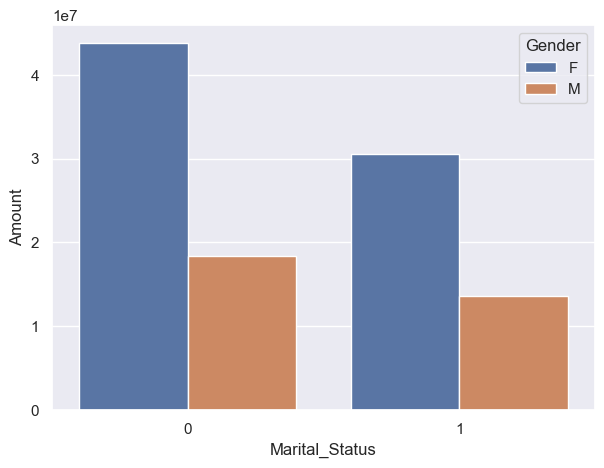

In [27]:
sales_mar = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Marital_Status', y = 'Amount', data = sales_mar, hue = 'Gender')
#To analyse which married gender has spent more.....

***From above graph we ca say that married women have spent more than married men and also their purchasing power is more***

### Occupation 

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

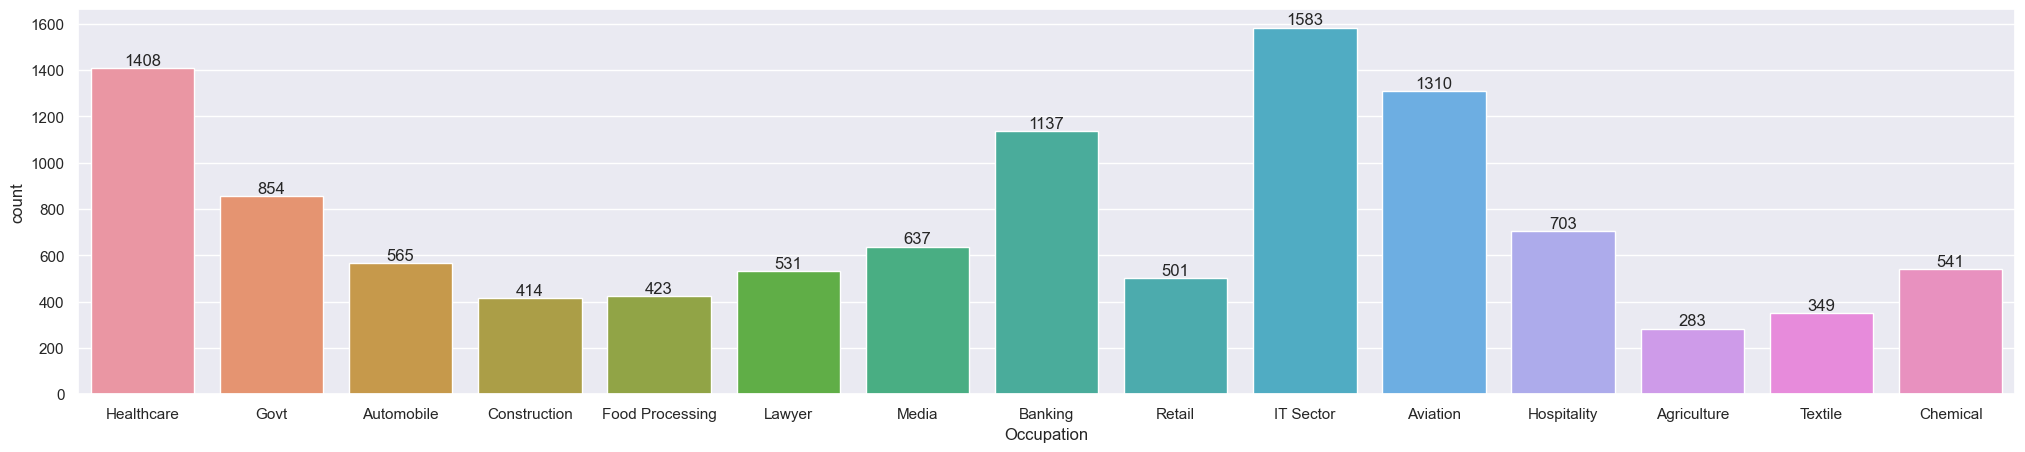

In [34]:
ax = sns.countplot(x = 'Occupation', data = df)
sns.set(rc={'figure.figsize':(20,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

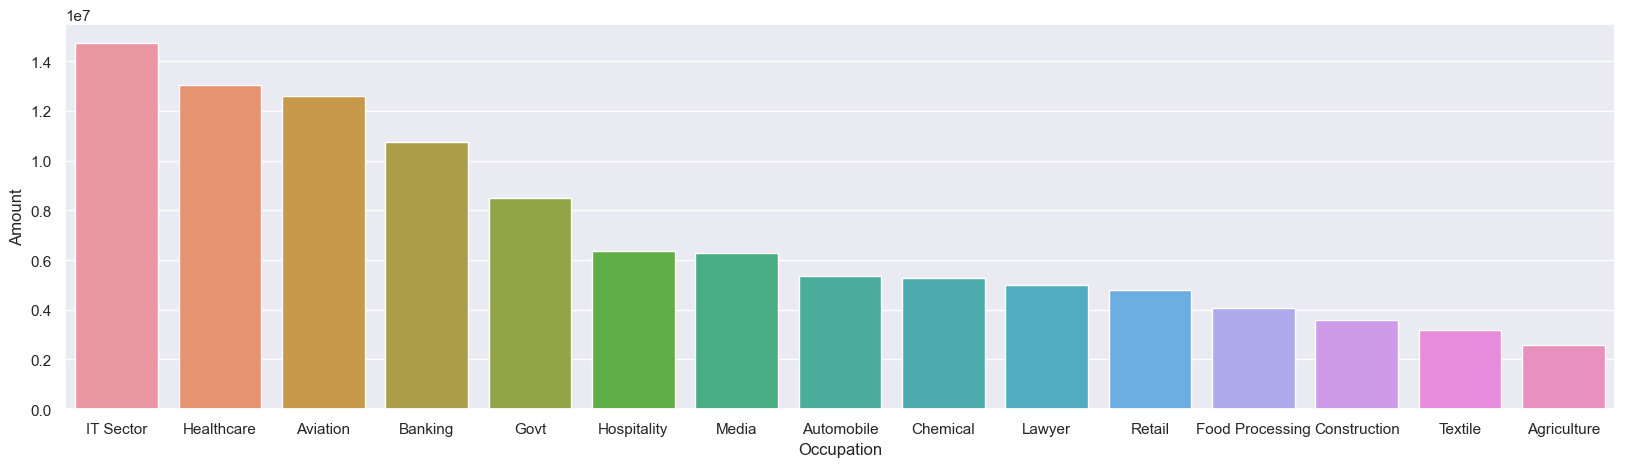

In [30]:
sales_occ = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Occupation', y = 'Amount', data = sales_occ)
# To know people in which occupation have spent more....

***From above graph we can say that most buyers work in IT,Healthcare and Aviation sectors***

### Product Category

In [31]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

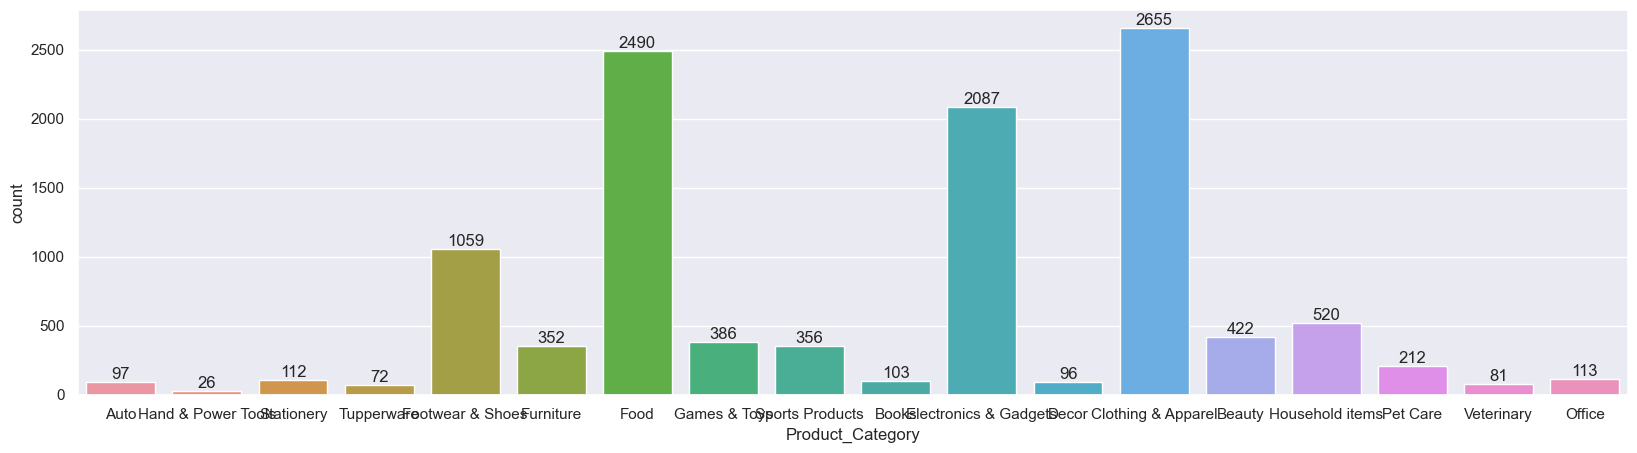

In [32]:
ax = sns.countplot(x = 'Product_Category', data = df)

sns.set(rc={'figure.figsize':(25,5)})
for bars in ax.containers:
    ax.bar_label(bars)

***From above graph we can say most products ordered are from Clothing, Food, Electronics and Gadgets  categories respectively***

<Axes: xlabel='Product_Category', ylabel='Amount'>

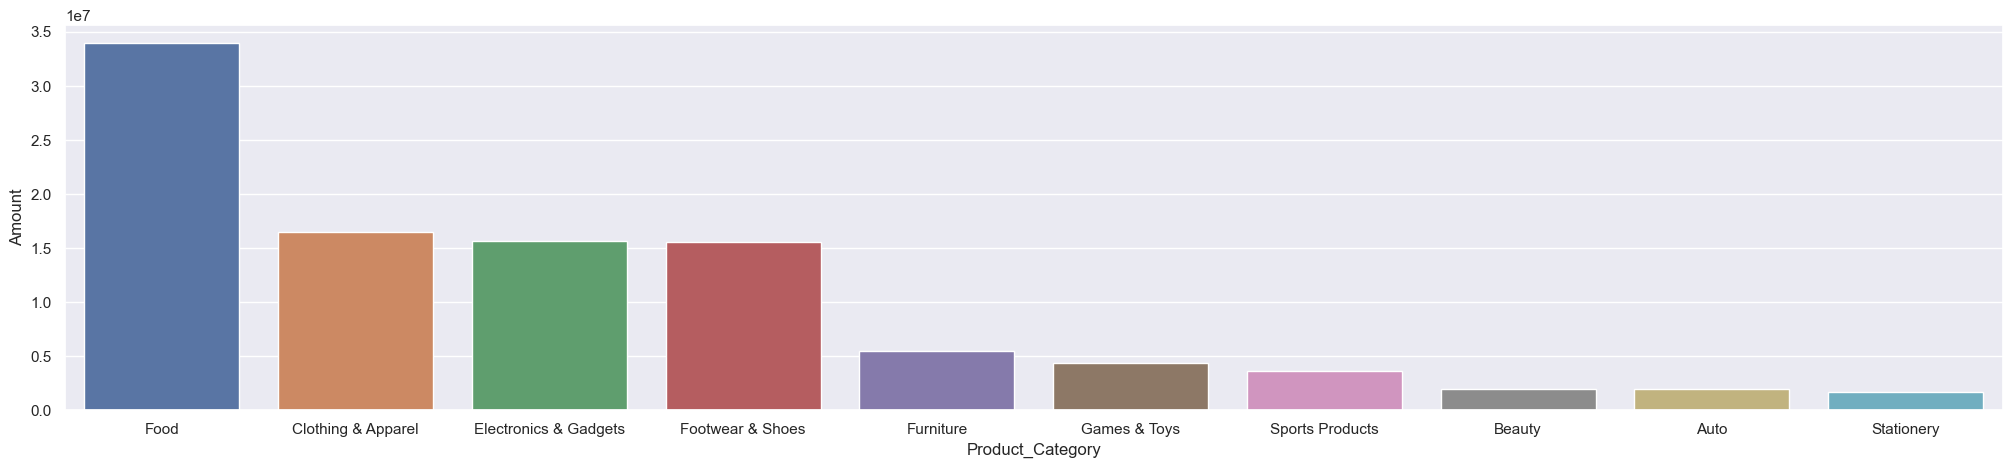

In [33]:
sales_pro = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_pro)
#To know sales in which Product Category are more.....

***From above graph we can say that the sales of products in categories Food,Clothing,Electronics are more respectively***


# Conclusion

***Married women from 26-35 years from UP,Maharastra,Karnataka working in IT,Healthcare,Aviation sectors are likely to buy products from categories like Food,Clothing&Apparel,Electronics&Gadgets***